Import

In [1]:
!git clone https://github.com/AndreasHammerKU/CardiacCTAnalysis.git
%cd CardiacCTAnalysis

Cloning into 'CardiacCTAnalysis'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 363 (delta 72), reused 82 (delta 44), pack-reused 223 (from 1)
Receiving objects: 100% (363/363), 2.51 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (198/198), done.
/content/CardiacCTAnalysis


Imports from Github Repository

In [2]:
!pip install dash
import numpy as np

# Custom Imports
import utils.io_utils as io
import utils.logger as logs
from baseline.BaseEnvironment import MedicalImageEnvironment
from utils.io_utils import DataLoader
from baseline.BaseAgent import DQNAgent
from utils.parser import Experiment, ExperimentConfig

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

dataset_folder = '/content/drive/MyDrive/Data'

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 9.8 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=f0e31812c002c8f3396d834aa2b5154732272181add6a38a0ed0b0344192b5b6
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
Mounted at /content/drive


Hyperparameters

In [3]:
debug = False

# Colab not enough RAM
preload_images = False
logger = logs.setup_logger(debug)

dataLoader = DataLoader(dataset_folder)

In [4]:
def run_training(config):
  train_env = MedicalImageEnvironment(logger=logger,
                                dataLoader=dataLoader,
                                image_list=['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30'],
                                agents=config.agents,
                                preload_images=preload_images)
  eval_env = MedicalImageEnvironment(logger=logger,
                                task="eval",
                                dataLoader=dataLoader,
                                image_list=['n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40'],
                                agents=config.agents)
  agent = DQNAgent(train_environment=train_env,
                   eval_environment=eval_env,
                   task="train",
                   logger=logger,
                   state_dim=train_env.state_size,
                   action_dim=train_env.n_actions,
                   attention=config.attention,
                   model_type=config.model_type,
                   agents=config.agents,
                   max_steps=config.max_steps,
                   episodes=config.episodes,
                   decay=config.decay,
                   image_interval=config.image_interval,
                   evaluation_steps=config.evaluation_steps,
                   evaluation_interval=config.evaluation_interval,
                   experiment=config.experiment)

  agent.train_dqn()
  train_env.visualize_current_state()
  eval_env.visualize_current_state()

def run_test(config):
  test_env = MedicalImageEnvironment(logger=logger,
                                task="test",
                                dataLoader=dataLoader,
                                image_list=['n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50'],
                                agents=config.agents)
  agent = DQNAgent(test_environment=test_env,
                   task="test",
                   logger=logger,
                   state_dim=test_env.state_size,
                   action_dim=test_env.n_actions,
                   attention=config.attention,
                   agents=config.agents,
                   model_path=f"latest-model-{config.model_type}-{config.experiment.name}.pt",
                   model_type=config.model_type,
                   max_steps=config.max_steps,
                   episodes=config.episodes,
                   evaluation_steps=25,
                   experiment=config.experiment
                   )

  agent.test_dqn()
  test_env.visualize_current_state()

Experiment 1: Network 3D - work alone

In [5]:
config = ExperimentConfig(model_type="Network3D",
                          max_steps=500,
                          image_interval=2,
                          episodes=50,
                          agents=6,
                          evaluation_steps=30,
                          evaluation_interval=10,
                          decay=150, # EPSILON = MIN_EPS - (MAX_EPS - MIN_EPS) * e^(-1 * current_step / decay)
                          attention=False,
                          experiment=Experiment.WORK_ALONE
                          )

INFO:Logger:Episode 1: Total Reward = -16.85 | Final Avg Distance 40.65 | Distances in mm [ 4.47  5.3   9.03  1.12  5.74 17.17] | Avg Closest Point = 12.89 | Avg Furthest Point = 53.01
INFO:Logger:Episode 2: Total Reward = 2.78 | Final Avg Distance 21.03 | Distances in mm [2.55 3.19 5.6  3.16 1.96 5.49] | Avg Closest Point = 8.90 | Avg Furthest Point = 33.16
INFO:Logger:Episode 3: Total Reward = -2.39 | Final Avg Distance 30.44 | Distances in mm [2.7  9.16 3.86 3.04 9.43 3.19] | Avg Closest Point = 11.03 | Avg Furthest Point = 42.97
INFO:Logger:Episode 4: Total Reward = 13.34 | Final Avg Distance 14.70 | Distances in mm [1.74 1.96 1.47 1.72 4.96 2.23] | Avg Closest Point = 4.68 | Avg Furthest Point = 29.17
INFO:Logger:Episode 5: Total Reward = 26.82 | Final Avg Distance 7.86 | Distances in mm [0.11 2.57 2.14 0.97 0.32 0.41] | Avg Closest Point = 2.22 | Avg Furthest Point = 36.54
INFO:Logger:Episode 6: Total Reward = 32.91 | Final Avg Distance 1.77 | Distances in mm [0.11 0.21 0.43 0.11

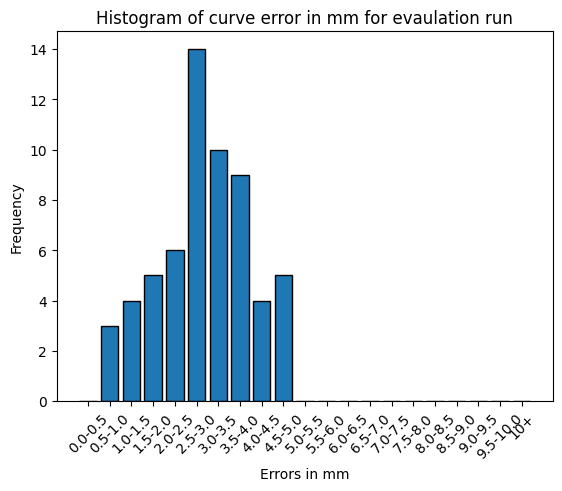

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 17.87
INFO:Logger:Average Furthest Distance Across Agents: 28.60
INFO:Logger:Episode 11: Total Reward = 27.58 | Final Avg Distance 3.34 | Distances in mm [0.4  0.53 0.54 1.86 0.53 0.27] | Avg Closest Point = 0.50 | Avg Furthest Point = 32.73
INFO:Logger:Episode 12: Total Reward = 28.81 | Final Avg Distance 2.11 | Distances in mm [0.4  0.27 0.54 0.27 0.54 0.53] | Avg Closest Point = 0.00 | Avg Furthest Point = 33.67
INFO:Logger:Episode 13: Total Reward = 33.02 | Final Avg Distance 1.66 | Distances in mm [0.31 0.21 0.21 0.32 0.32 0.21] | Avg Closest Point = 0.00 | Avg Furthest Point = 35.91
INFO:Logger:Episode 14: Total Reward = 33.35 | Final Avg Distance 1.33 | Distances in mm [0.11 0.21 0.22 0.32 0.1  0.22] | Avg Closest Point = 0.17 | Avg Furthest Point = 36.76
INFO:Logger:Episode 15: Total Reward = 36.89 | Final Avg Distance 1.93 | Distances in mm [0.2  0.1  0.51 0.21 0.4  0.1 ] | Avg Close

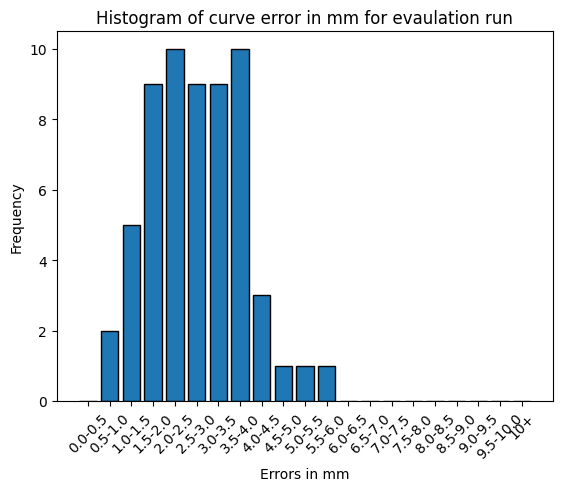

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 16.13
INFO:Logger:Average Furthest Distance Across Agents: 29.92
INFO:Logger:Episode 21: Total Reward = 27.20 | Final Avg Distance 2.23 | Distances in mm [0.54 0.27 0.53 0.13 0.53 0.67] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.24
INFO:Logger:Episode 22: Total Reward = 27.57 | Final Avg Distance 1.86 | Distances in mm [0.27 0.53 0.27 0.4  0.27 0.4 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.82
INFO:Logger:Episode 23: Total Reward = 28.70 | Final Avg Distance 1.43 | Distances in mm [0.25 0.25 0.24 0.38 0.12 0.12] | Avg Closest Point = 0.17 | Avg Furthest Point = 32.21
INFO:Logger:Episode 24: Total Reward = 28.92 | Final Avg Distance 1.21 | Distances in mm [0.25 0.25 0.24 0.13 0.13 0.12] | Avg Closest Point = 0.00 | Avg Furthest Point = 34.67
INFO:Logger:Episode 25: Total Reward = 21.97 | Final Avg Distance 1.83 | Distances in mm [0.38 0.1  0.26 0.36 0.26 0.51] | Avg Close

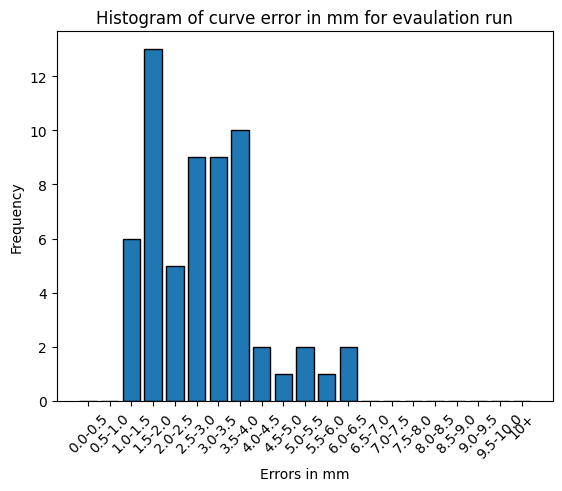

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 14.33
INFO:Logger:Average Furthest Distance Across Agents: 28.27
INFO:Logger:Episode 31: Total Reward = 15.67 | Final Avg Distance 10.65 | Distances in mm [ 0.37  0.26 11.49  0.5   0.25  0.24] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.30
INFO:Logger:Episode 32: Total Reward = 24.62 | Final Avg Distance 1.70 | Distances in mm [0.37 0.24 0.25 0.24 0.25 0.51] | Avg Closest Point = 0.17 | Avg Furthest Point = 28.54
INFO:Logger:Episode 33: Total Reward = 30.46 | Final Avg Distance 2.93 | Distances in mm [0.3  1.47 0.11 0.21 0.21 0.11] | Avg Closest Point = 0.17 | Avg Furthest Point = 34.13
INFO:Logger:Episode 34: Total Reward = 31.74 | Final Avg Distance 1.65 | Distances in mm [0.11 0.21 0.3  0.21 0.41 0.1 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 34.08
INFO:Logger:Episode 35: Total Reward = 24.06 | Final Avg Distance 5.82 | Distances in mm [0.3  0.76 1.12 1.98 1.2  2.16] | Av

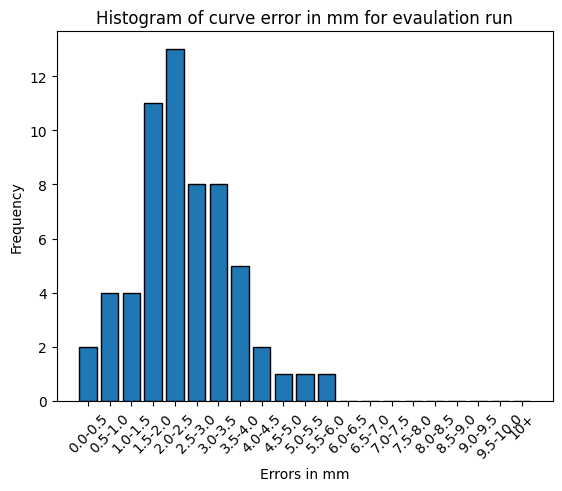

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.63
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 41: Total Reward = 18.69 | Final Avg Distance 9.36 | Distances in mm [1.18 7.31 0.12 0.81 0.44 0.37] | Avg Closest Point = 2.07 | Avg Furthest Point = 31.13
INFO:Logger:Episode 42: Total Reward = 26.35 | Final Avg Distance 1.70 | Distances in mm [0.34 0.4  0.34 0.12 0.   0.34] | Avg Closest Point = 0.50 | Avg Furthest Point = 30.28
INFO:Logger:Episode 43: Total Reward = 26.46 | Final Avg Distance 1.59 | Distances in mm [0.32 0.22 0.34 0.12 0.22 0.34] | Avg Closest Point = 0.00 | Avg Furthest Point = 29.08
INFO:Logger:Episode 44: Total Reward = 26.79 | Final Avg Distance 1.26 | Distances in mm [0.12 0.22 0.1  0.12 0.22 0.34] | Avg Closest Point = 0.00 | Avg Furthest Point = 30.05
INFO:Logger:Episode 45: Total Reward = 21.38 | Final Avg Distance 2.42 | Distances in mm [0.36 0.36 0.48 0.13 0.74 0.43] | Avg Close

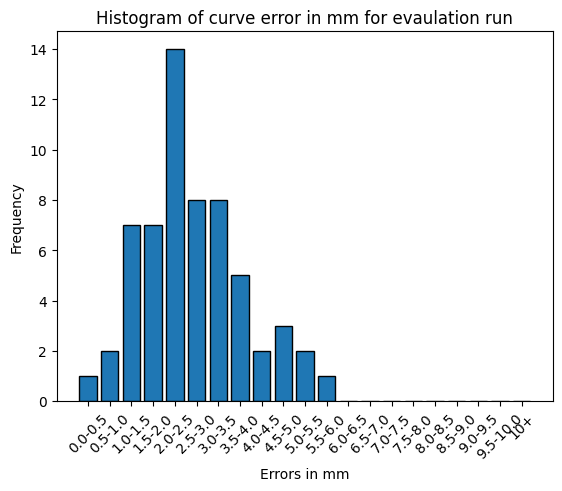

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 13.88
INFO:Logger:Average Furthest Distance Across Agents: 27.34


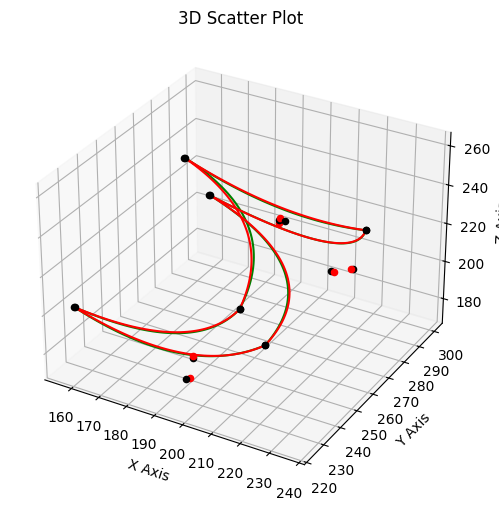

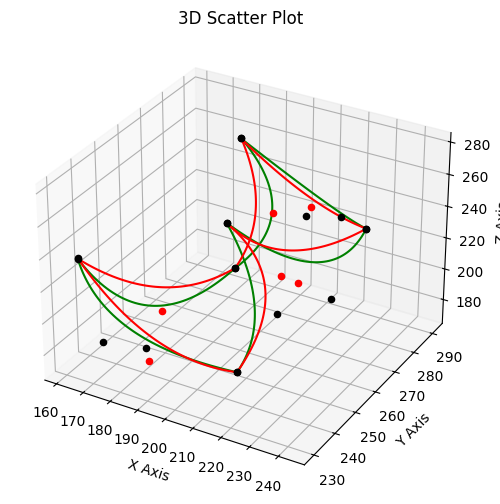

In [7]:
run_training(config)

INFO:Logger:Evaluation Episode 1: Total Reward = 13.26 | Final Average Distance = 10.07 | Error in mm [2.12 0.88 1.58 3.54 2.07 1.35] | Closest Point = [11.45  1.   10.05 17.61 10.44  6.56] | Furthest Point = [24.08 19.03 17.83 25.98 25.5  23.54]
INFO:Logger:Evaluation Episode 2: Total Reward = 12.33 | Final Average Distance = 10.43 | Error in mm [1.44 1.95 1.53 3.09 1.95 1.79] | Closest Point = [ 3.74  9.22  9.27 12.73 10.34  9.7 ] | Furthest Point = [13.34 25.57 23.43 21.61 25.73 22.47]
INFO:Logger:Evaluation Episode 3: Total Reward = 12.43 | Final Average Distance = 14.65 | Error in mm [2.19 2.16 2.25 2.76 1.65 4.21] | Closest Point = [13.04 11.18 12.88 15.39 10.68 22.47] | Furthest Point = [27.15 22.34 22.58 29.53 25.48 31.19]
INFO:Logger:Evaluation Episode 4: Total Reward = 15.98 | Final Average Distance = 16.06 | Error in mm [1.64 2.24 2.15 3.45 2.41 3.23] | Closest Point = [12.17 13.49 13.49 22.69 15.78 18.14] | Furthest Point = [23.43 33.85 31.92 33.56 36.11 29.07]
INFO:Logger:

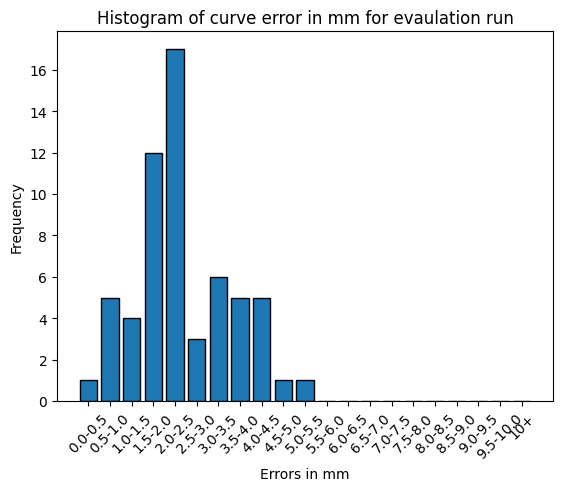

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.46
INFO:Logger:Average Furthest Distance Across Agents: 27.09


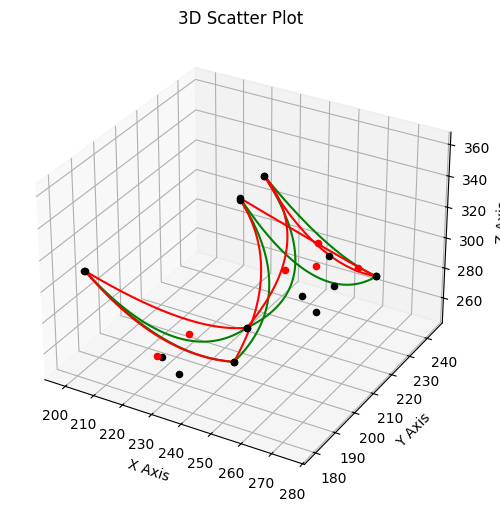

In [8]:
run_test(config)

Experiment 2: Network 3D - share positions

In [9]:
config.experiment = Experiment.SHARE_POSITIONS

INFO:Logger:Episode 1: Total Reward = -37.12 | Final Avg Distance 59.53 | Distances in mm [ 1.9   8.77  9.89 17.92 17.58  6.26] | Avg Closest Point = 9.83 | Avg Furthest Point = 66.26
INFO:Logger:Episode 2: Total Reward = -21.74 | Final Avg Distance 44.15 | Distances in mm [ 9.51  1.83 11.55  3.78 17.01  4.4 ] | Avg Closest Point = 9.51 | Avg Furthest Point = 57.61
INFO:Logger:Episode 3: Total Reward = -8.62 | Final Avg Distance 35.46 | Distances in mm [12.39  4.81  3.47 11.8   3.6   2.47] | Avg Closest Point = 13.39 | Avg Furthest Point = 55.18
INFO:Logger:Episode 4: Total Reward = -3.67 | Final Avg Distance 30.51 | Distances in mm [ 1.4   3.24 19.97  3.    0.38  1.77] | Avg Closest Point = 3.87 | Avg Furthest Point = 47.95
INFO:Logger:Episode 5: Total Reward = 15.44 | Final Avg Distance 13.99 | Distances in mm [1.34 1.34 3.21 2.55 6.39 2.  ] | Avg Closest Point = 3.06 | Avg Furthest Point = 33.50
INFO:Logger:Episode 6: Total Reward = 27.54 | Final Avg Distance 1.89 | Distances in mm 

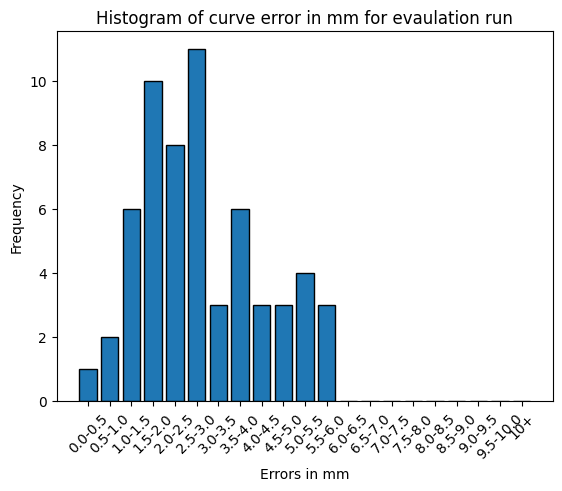

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 16.93
INFO:Logger:Average Furthest Distance Across Agents: 27.97
INFO:Logger:Episode 11: Total Reward = 19.03 | Final Avg Distance 9.02 | Distances in mm [0.34 0.24 1.3  1.92 0.49 4.43] | Avg Closest Point = 0.90 | Avg Furthest Point = 32.25
INFO:Logger:Episode 12: Total Reward = 26.70 | Final Avg Distance 1.34 | Distances in mm [0.12 0.22 0.32 0.12 0.22 0.1 ] | Avg Closest Point = 0.17 | Avg Furthest Point = 30.35
INFO:Logger:Episode 13: Total Reward = 25.65 | Final Avg Distance 2.31 | Distances in mm [0.4  0.27 0.53 0.26 0.27 0.94] | Avg Closest Point = 0.81 | Avg Furthest Point = 31.53
INFO:Logger:Episode 14: Total Reward = 26.46 | Final Avg Distance 1.50 | Distances in mm [0.13 0.27 0.27 0.27 0.27 0.4 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 29.61
INFO:Logger:Episode 15: Total Reward = 30.04 | Final Avg Distance 3.91 | Distances in mm [0.8  0.53 0.53 0.13 0.27 1.74] | Avg Close

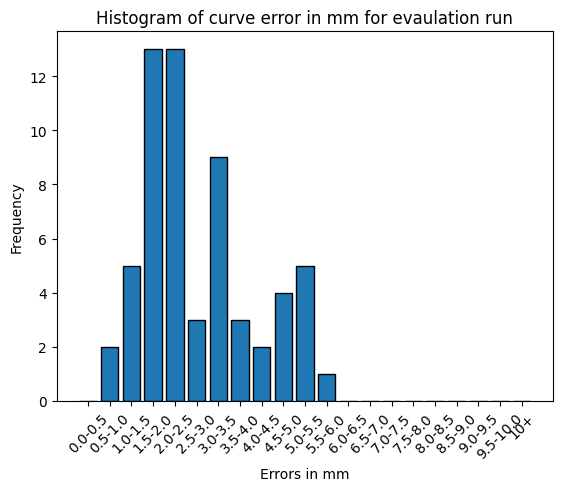

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 17.61
INFO:Logger:Average Furthest Distance Across Agents: 28.56
INFO:Logger:Episode 21: Total Reward = 9.65 | Final Avg Distance 20.22 | Distances in mm [ 1.68  3.78 14.41  1.04  2.56  3.87] | Avg Closest Point = 2.47 | Avg Furthest Point = 36.43
INFO:Logger:Episode 22: Total Reward = 28.50 | Final Avg Distance 1.38 | Distances in mm [0.28 0.13 0.57 0.15 0.28 0.15] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.51
INFO:Logger:Episode 23: Total Reward = 24.97 | Final Avg Distance 1.35 | Distances in mm [0.12 0.   0.51 0.25 0.24 0.25] | Avg Closest Point = 0.00 | Avg Furthest Point = 28.55
INFO:Logger:Episode 24: Total Reward = 25.04 | Final Avg Distance 1.28 | Distances in mm [0.12 0.51 0.   0.24 0.24 0.25] | Avg Closest Point = 0.00 | Avg Furthest Point = 27.64
INFO:Logger:Episode 25: Total Reward = 30.04 | Final Avg Distance 3.35 | Distances in mm [0.31 0.21 0.52 0.43 0.21 1.16] | Avg

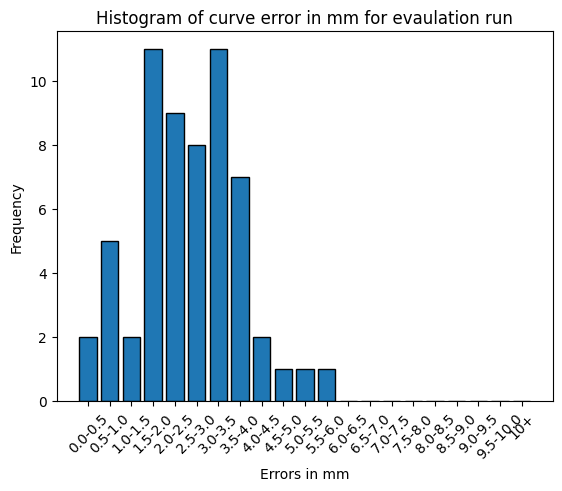

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 13.15
INFO:Logger:Average Furthest Distance Across Agents: 27.61
INFO:Logger:Episode 31: Total Reward = 18.99 | Final Avg Distance 2.65 | Distances in mm [0.5  0.38 0.51 0.26 0.26 0.87] | Avg Closest Point = 0.00 | Avg Furthest Point = 23.99
INFO:Logger:Episode 32: Total Reward = 20.15 | Final Avg Distance 1.50 | Distances in mm [0.26 0.38 0.26 0.26 0.26 0.12] | Avg Closest Point = 0.00 | Avg Furthest Point = 22.70
INFO:Logger:Episode 33: Total Reward = 23.78 | Final Avg Distance 1.36 | Distances in mm [0.13 0.13 0.13 0.26 0.26 0.39] | Avg Closest Point = 0.00 | Avg Furthest Point = 26.71
INFO:Logger:Episode 34: Total Reward = 23.63 | Final Avg Distance 1.50 | Distances in mm [0.13 0.39 0.39 0.26 0.26 0.39] | Avg Closest Point = 0.00 | Avg Furthest Point = 27.44
INFO:Logger:Episode 35: Total Reward = 23.26 | Final Avg Distance 6.57 | Distances in mm [1.73 0.5  1.67 0.46 0.4  1.86] | Avg Close

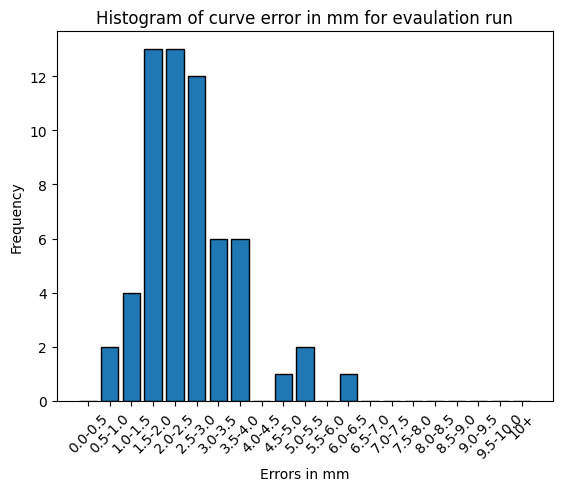

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 13.93
INFO:Logger:Average Furthest Distance Across Agents: 27.45
INFO:Logger:Episode 41: Total Reward = 19.67 | Final Avg Distance 1.95 | Distances in mm [0.13 0.4  0.4  0.13 0.13 0.8 ] | Avg Closest Point = 0.17 | Avg Furthest Point = 24.12
INFO:Logger:Episode 42: Total Reward = 20.55 | Final Avg Distance 1.07 | Distances in mm [0.13 0.13 0.13 0.13 0.13 0.26] | Avg Closest Point = 0.00 | Avg Furthest Point = 22.60
INFO:Logger:Episode 43: Total Reward = 27.90 | Final Avg Distance 1.92 | Distances in mm [0.63 0.5  0.37 0.2  0.13 0.1 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.36
INFO:Logger:Episode 44: Total Reward = 28.15 | Final Avg Distance 1.67 | Distances in mm [0.13 0.23 0.37 0.23 0.37 0.4 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 30.35
INFO:Logger:Episode 45: Total Reward = 26.67 | Final Avg Distance 7.28 | Distances in mm [0.53 1.06 1.86 0.4  2.12 2.8 ] | Avg Close

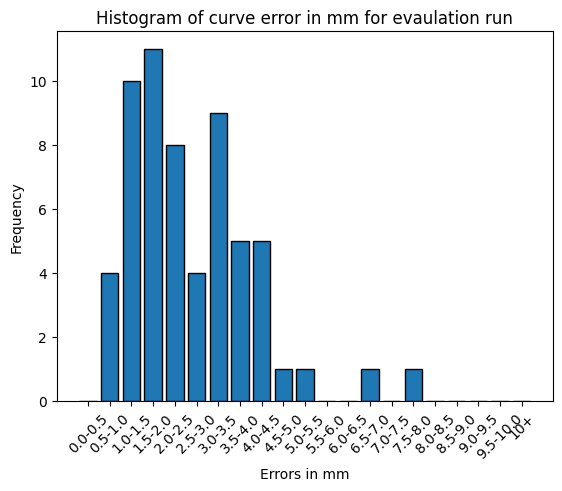

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 14.70
INFO:Logger:Average Furthest Distance Across Agents: 28.12


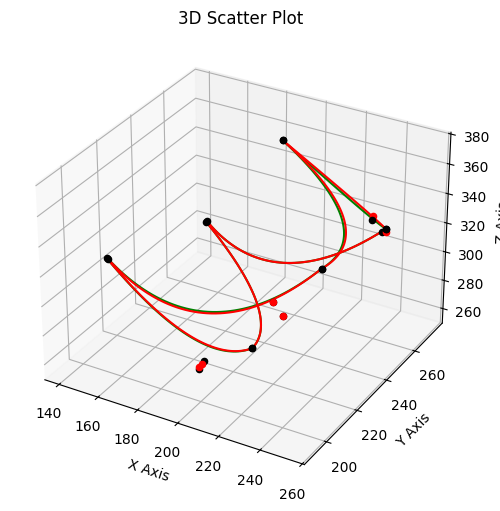

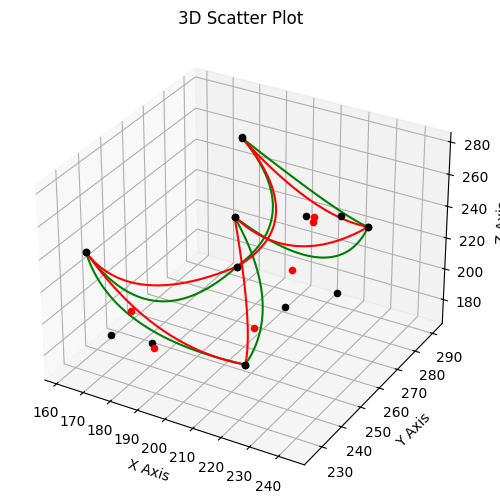

In [10]:
run_training(config)

In [11]:
run_test(config)

AttributeError: 'NoneType' object has no attribute '_location'

Experiment 3: Network 3D share pairwise positions

In [12]:
config.experiment = Experiment.SHARE_PAIRWISE

INFO:Logger:Episode 1: Total Reward = -36.42 | Final Avg Distance 66.54 | Distances in mm [11.79  8.49  8.51 18.91  9.45 18.47] | Avg Closest Point = 21.34 | Avg Furthest Point = 74.03
INFO:Logger:Episode 2: Total Reward = -41.64 | Final Avg Distance 71.77 | Distances in mm [10.94 11.27  5.35  7.96 22.87 20.29] | Avg Closest Point = 11.14 | Avg Furthest Point = 90.51
INFO:Logger:Episode 3: Total Reward = -19.52 | Final Avg Distance 47.57 | Distances in mm [ 7.42  9.71  5.1   6.35 17.77  3.35] | Avg Closest Point = 20.33 | Avg Furthest Point = 60.06
INFO:Logger:Episode 4: Total Reward = -77.62 | Final Avg Distance 105.67 | Distances in mm [ 3.56 22.25 24.52 19.87 26.4   7.04] | Avg Closest Point = 6.63 | Avg Furthest Point = 109.08
INFO:Logger:Episode 5: Total Reward = -10.20 | Final Avg Distance 34.02 | Distances in mm [ 5.05  5.2   3.69 10.19 10.63  3.1 ] | Avg Closest Point = 8.86 | Avg Furthest Point = 42.56
INFO:Logger:Episode 6: Total Reward = 7.63 | Final Avg Distance 16.18 | Dis

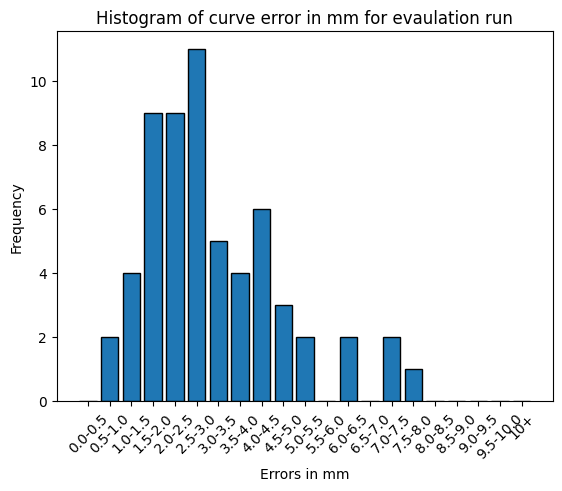

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 14.27
INFO:Logger:Average Furthest Distance Across Agents: 27.84
INFO:Logger:Episode 11: Total Reward = 18.85 | Final Avg Distance 11.03 | Distances in mm [1.16 1.04 2.41 2.79 5.13 1.74] | Avg Closest Point = 1.59 | Avg Furthest Point = 43.63
INFO:Logger:Episode 12: Total Reward = 28.46 | Final Avg Distance 1.41 | Distances in mm [0.28 0.15 0.3  0.13 0.28 0.44] | Avg Closest Point = 0.17 | Avg Furthest Point = 32.57
INFO:Logger:Episode 13: Total Reward = 19.80 | Final Avg Distance 1.84 | Distances in mm [0.   0.38 0.25 0.75 0.5  0.38] | Avg Closest Point = 0.17 | Avg Furthest Point = 23.62
INFO:Logger:Episode 14: Total Reward = 20.08 | Final Avg Distance 1.57 | Distances in mm [0.26 0.13 0.5  0.25 0.25 0.38] | Avg Closest Point = 0.17 | Avg Furthest Point = 24.65
INFO:Logger:Episode 15: Total Reward = 24.99 | Final Avg Distance 1.51 | Distances in mm [0.14 0.27 0.27 0.13 0.54 0.27] | Avg Clos

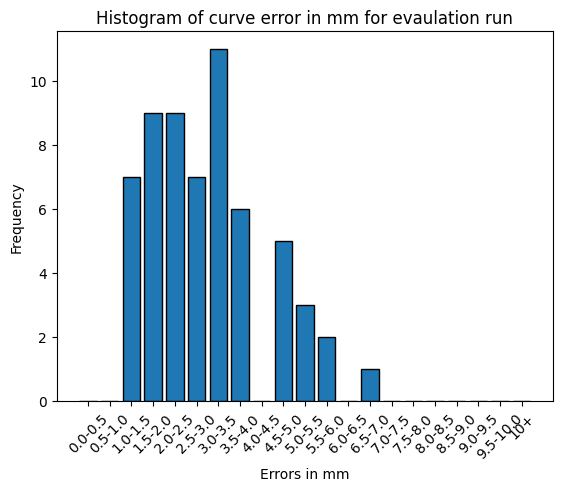

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 15.08
INFO:Logger:Average Furthest Distance Across Agents: 27.74
INFO:Logger:Episode 21: Total Reward = 32.76 | Final Avg Distance 1.92 | Distances in mm [0.31 0.21 0.2  0.33 0.31 0.21] | Avg Closest Point = 0.00 | Avg Furthest Point = 36.39
INFO:Logger:Episode 22: Total Reward = 33.14 | Final Avg Distance 1.54 | Distances in mm [0.32 0.22 0.21 0.32 0.1  0.22] | Avg Closest Point = 0.00 | Avg Furthest Point = 37.94
INFO:Logger:Episode 23: Total Reward = 22.39 | Final Avg Distance 1.41 | Distances in mm [0.13 0.13 0.23 0.36 0.23 0.26] | Avg Closest Point = 0.17 | Avg Furthest Point = 26.64
INFO:Logger:Episode 24: Total Reward = 22.27 | Final Avg Distance 1.54 | Distances in mm [0.13 0.36 0.23 0.33 0.23 0.23] | Avg Closest Point = 0.00 | Avg Furthest Point = 26.14
INFO:Logger:Episode 25: Total Reward = 23.87 | Final Avg Distance 1.44 | Distances in mm [0.24 0.12 0.24 0.24 0.22 0.24] | Avg Close

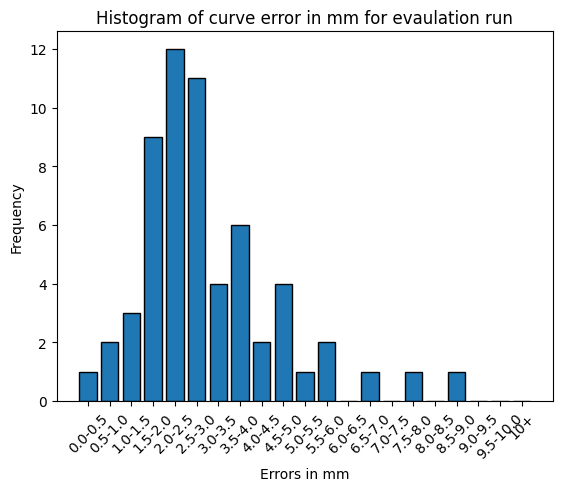

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 17.86
INFO:Logger:Average Furthest Distance Across Agents: 27.94
INFO:Logger:Episode 31: Total Reward = 15.01 | Final Avg Distance 9.52 | Distances in mm [0.7  2.11 0.28 3.21 5.15 0.72] | Avg Closest Point = 2.96 | Avg Furthest Point = 28.11
INFO:Logger:Episode 32: Total Reward = 23.03 | Final Avg Distance 1.50 | Distances in mm [0.42 0.13 0.28 0.42 0.29 0.42] | Avg Closest Point = 0.00 | Avg Furthest Point = 25.58
INFO:Logger:Episode 33: Total Reward = 27.31 | Final Avg Distance 2.70 | Distances in mm [0.1  0.58 0.68 0.26 0.71 0.61] | Avg Closest Point = 0.99 | Avg Furthest Point = 31.64
INFO:Logger:Episode 34: Total Reward = 28.63 | Final Avg Distance 1.38 | Distances in mm [0.33 0.33 0.26 0.   0.23 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.79
INFO:Logger:Episode 35: Total Reward = 25.83 | Final Avg Distance 2.13 | Distances in mm [0.67 0.   0.53 0.   0.8  0.4 ] | Avg Close

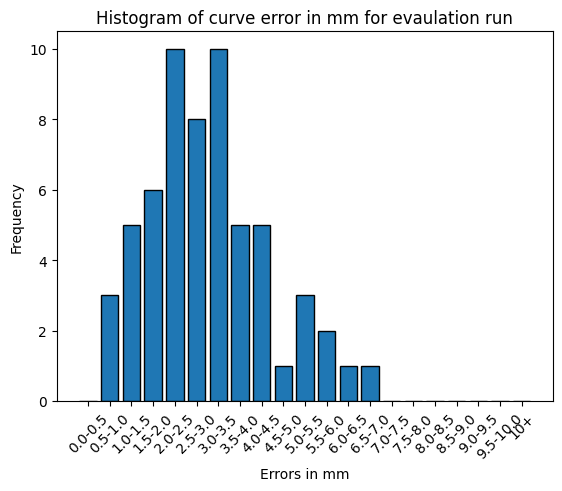

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 15.63
INFO:Logger:Average Furthest Distance Across Agents: 27.67
INFO:Logger:Episode 41: Total Reward = 25.34 | Final Avg Distance 5.57 | Distances in mm [0.13 0.79 0.27 3.21 0.53 0.27] | Avg Closest Point = 1.34 | Avg Furthest Point = 33.09
INFO:Logger:Episode 42: Total Reward = 29.57 | Final Avg Distance 1.35 | Distances in mm [0.13 0.27 0.27 0.27 0.27 0.27] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.45
INFO:Logger:Episode 43: Total Reward = 31.97 | Final Avg Distance 1.99 | Distances in mm [0.27 0.54 0.27 0.4  0.53 0.13] | Avg Closest Point = 0.50 | Avg Furthest Point = 34.72
INFO:Logger:Episode 44: Total Reward = 32.38 | Final Avg Distance 1.57 | Distances in mm [0.53 0.27 0.27 0.4  0.27 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 36.49
INFO:Logger:Episode 45: Total Reward = 24.41 | Final Avg Distance 1.91 | Distances in mm [0.37 0.25 0.   1.01 0.26 0.25] | Avg Close

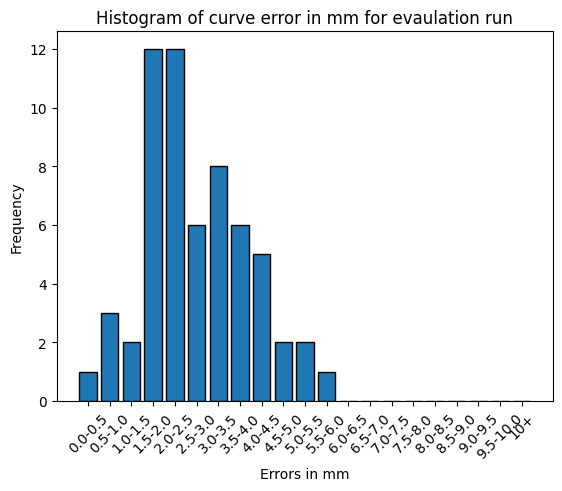

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.54
INFO:Logger:Average Furthest Distance Across Agents: 27.55


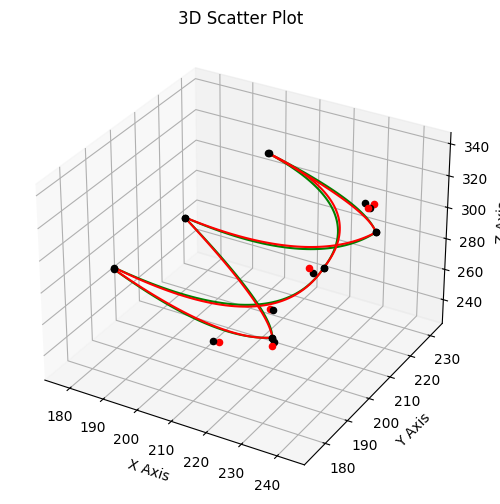

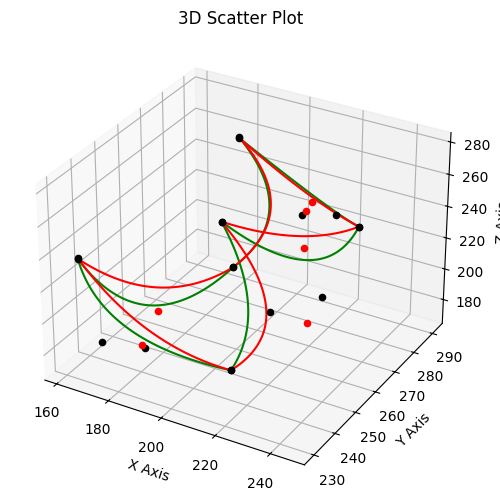

In [13]:
run_training(config)

In [ ]:
run_test(config)

Experiment 4: CommNet - work alone

In [14]:
config.experiment = Experiment.WORK_ALONE
config.model_type = "CommNet"

INFO:Logger:Episode 1: Total Reward = 11.10 | Final Avg Distance 16.95 | Distances in mm [4.71 4.07 1.23 2.84 1.95 1.96] | Avg Closest Point = 10.44 | Avg Furthest Point = 36.13
INFO:Logger:Episode 2: Total Reward = 13.00 | Final Avg Distance 15.05 | Distances in mm [0.57 1.87 3.02 6.85 0.24 3.96] | Avg Closest Point = 3.42 | Avg Furthest Point = 31.35
INFO:Logger:Episode 3: Total Reward = 15.95 | Final Avg Distance 17.73 | Distances in mm [1.23 4.68 5.97 1.23 0.91 3.31] | Avg Closest Point = 5.61 | Avg Furthest Point = 39.42
INFO:Logger:Episode 4: Total Reward = 31.94 | Final Avg Distance 1.74 | Distances in mm [0.1  0.33 0.14 0.33 0.37 0.37] | Avg Closest Point = 0.17 | Avg Furthest Point = 34.37
INFO:Logger:Episode 5: Total Reward = 27.55 | Final Avg Distance 3.37 | Distances in mm [1.74 0.54 0.53 0.53 0.27 0.27] | Avg Closest Point = 0.96 | Avg Furthest Point = 38.81
INFO:Logger:Episode 6: Total Reward = 29.57 | Final Avg Distance 1.35 | Distances in mm [0.13 0.27 0.27 0.27 0.27 0.

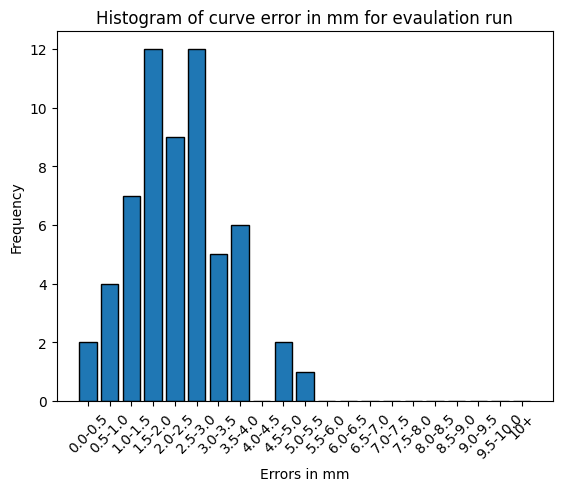

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.79
INFO:Logger:Average Furthest Distance Across Agents: 27.40
INFO:Logger:Episode 11: Total Reward = 29.19 | Final Avg Distance 1.72 | Distances in mm [0.4  0.27 0.27 0.27 0.53 0.27] | Avg Closest Point = 0.33 | Avg Furthest Point = 32.52
INFO:Logger:Episode 12: Total Reward = 29.30 | Final Avg Distance 1.62 | Distances in mm [0.13 0.27 0.27 0.27 0.27 0.53] | Avg Closest Point = 0.17 | Avg Furthest Point = 34.92
INFO:Logger:Episode 13: Total Reward = 20.30 | Final Avg Distance 3.16 | Distances in mm [0.67 0.45 0.35 0.47 0.11 1.02] | Avg Closest Point = 0.24 | Avg Furthest Point = 25.16
INFO:Logger:Episode 14: Total Reward = 22.13 | Final Avg Distance 1.33 | Distances in mm [0.24 0.24 0.11 0.22 0.35 0.11] | Avg Closest Point = 0.00 | Avg Furthest Point = 26.06
INFO:Logger:Episode 15: Total Reward = 26.05 | Final Avg Distance 1.98 | Distances in mm [0.23 0.23 0.39 0.33 0.33 0.36] | Avg Close

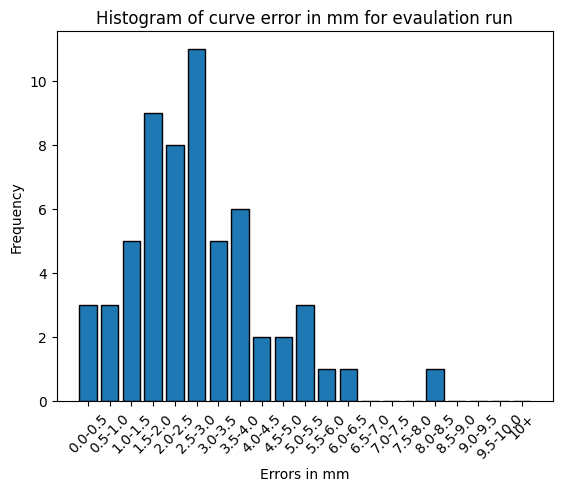

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.24
INFO:Logger:Average Furthest Distance Across Agents: 27.33
INFO:Logger:Episode 21: Total Reward = 28.39 | Final Avg Distance 1.74 | Distances in mm [0.25 0.5  0.51 0.38 0.12 0.12] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.43
INFO:Logger:Episode 22: Total Reward = 28.62 | Final Avg Distance 1.51 | Distances in mm [0.24 0.26 0.25 0.12 0.38 0.12] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.75
INFO:Logger:Episode 23: Total Reward = 23.00 | Final Avg Distance 1.53 | Distances in mm [0.13 0.13 0.86 0.15 0.28 0.15] | Avg Closest Point = 0.00 | Avg Furthest Point = 28.15
INFO:Logger:Episode 24: Total Reward = 23.27 | Final Avg Distance 1.26 | Distances in mm [0.15 0.15 0.28 0.13 0.28 0.42] | Avg Closest Point = 0.00 | Avg Furthest Point = 26.02
INFO:Logger:Episode 25: Total Reward = 27.47 | Final Avg Distance 1.95 | Distances in mm [0.27 0.53 0.27 0.13 0.54 0.67] | Avg Close

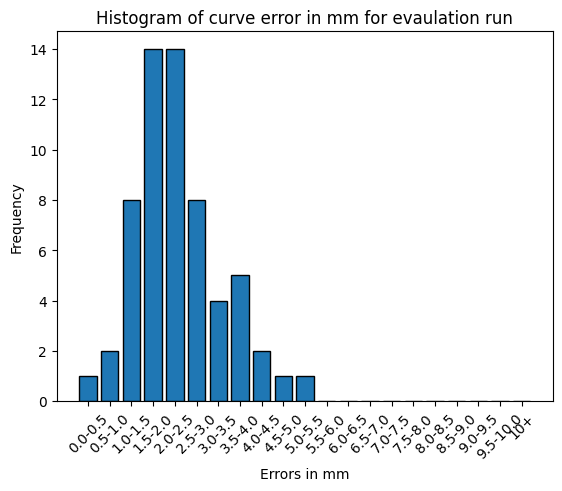

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.48
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 31: Total Reward = 23.39 | Final Avg Distance 1.14 | Distances in mm [0.15 0.13 0.28 0.15 0.28 0.13] | Avg Closest Point = 0.17 | Avg Furthest Point = 26.86
INFO:Logger:Episode 32: Total Reward = 23.19 | Final Avg Distance 1.34 | Distances in mm [0.44 0.15 0.29 0.15 0.28 0.15] | Avg Closest Point = 0.00 | Avg Furthest Point = 26.06
INFO:Logger:Episode 33: Total Reward = 28.34 | Final Avg Distance 1.67 | Distances in mm [0.13 0.1  0.48 0.23 0.48 0.1 ] | Avg Closest Point = 0.17 | Avg Furthest Point = 31.22
INFO:Logger:Episode 34: Total Reward = 28.56 | Final Avg Distance 1.45 | Distances in mm [0.36 0.1  0.23 0.23 0.23 0.36] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.46
INFO:Logger:Episode 35: Total Reward = 22.51 | Final Avg Distance 7.31 | Distances in mm [0.4  0.23 0.67 4.66 0.13 2.26] | Avg Close

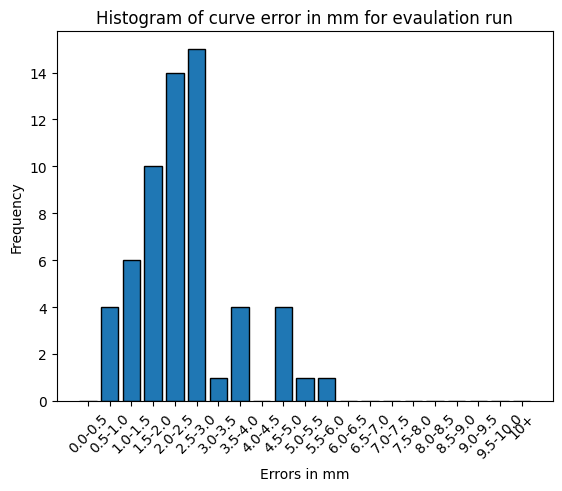

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.86
INFO:Logger:Average Furthest Distance Across Agents: 27.55
INFO:Logger:Episode 41: Total Reward = 20.48 | Final Avg Distance 1.16 | Distances in mm [0.26 0.38 0.   0.26 0.26 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 24.51
INFO:Logger:Episode 42: Total Reward = 20.37 | Final Avg Distance 1.28 | Distances in mm [0.26 0.13 0.25 0.26 0.26 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 23.13
INFO:Logger:Episode 43: Total Reward = 21.53 | Final Avg Distance 6.52 | Distances in mm [0.32 0.69 0.32 0.34 0.47 3.45] | Avg Closest Point = 1.94 | Avg Furthest Point = 30.47
INFO:Logger:Episode 44: Total Reward = 26.61 | Final Avg Distance 1.44 | Distances in mm [0.12 0.2  0.1  0.12 0.22 0.34] | Avg Closest Point = 0.00 | Avg Furthest Point = 34.14
INFO:Logger:Episode 45: Total Reward = 23.00 | Final Avg Distance 2.74 | Distances in mm [0.63 0.63 0.21 0.42 0.21 0.4 ] | Avg Close

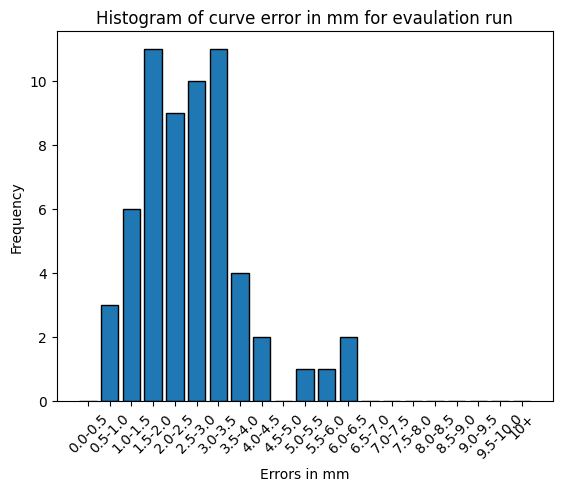

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 13.25
INFO:Logger:Average Furthest Distance Across Agents: 27.39


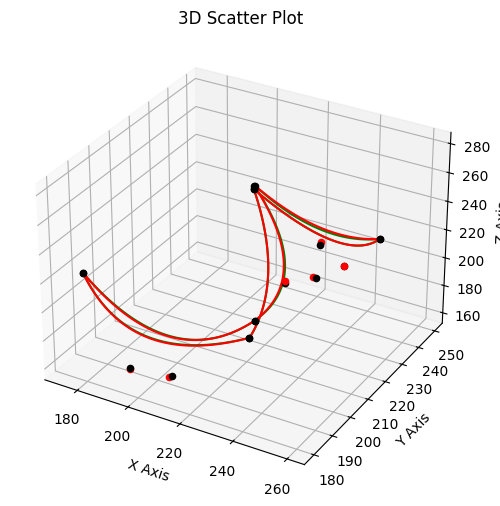

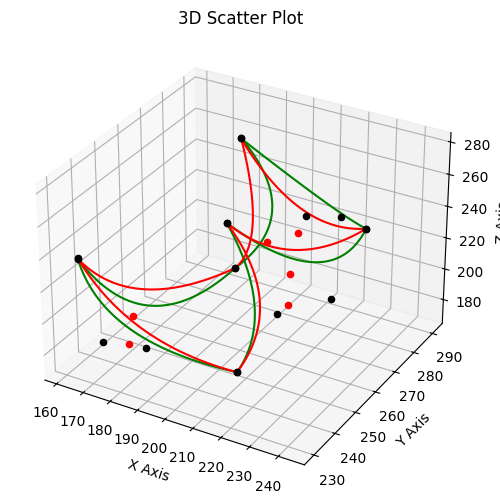

In [15]:
run_training(config)

In [ ]:
run_test(config)

Experiment 5: CommNet - share positions

In [16]:
config.experiment = Experiment.SHARE_POSITIONS

INFO:Logger:Episode 1: Total Reward = 22.34 | Final Avg Distance 11.05 | Distances in mm [1.98 2.54 2.4  2.08 0.81 0.3 ] | Avg Closest Point = 3.75 | Avg Furthest Point = 36.99
INFO:Logger:Episode 2: Total Reward = 29.91 | Final Avg Distance 3.48 | Distances in mm [0.32 0.82 0.92 0.21 0.43 0.52] | Avg Closest Point = 0.33 | Avg Furthest Point = 37.84
INFO:Logger:Episode 3: Total Reward = 23.11 | Final Avg Distance 15.71 | Distances in mm [2.24 2.38 2.54 1.44 1.83 3.73] | Avg Closest Point = 3.15 | Avg Furthest Point = 40.05
INFO:Logger:Episode 4: Total Reward = 36.29 | Final Avg Distance 2.53 | Distances in mm [0.2  0.31 0.7  0.61 0.2  0.1 ] | Avg Closest Point = 0.17 | Avg Furthest Point = 41.33
INFO:Logger:Episode 5: Total Reward = 26.38 | Final Avg Distance 1.58 | Distances in mm [0.4  0.27 0.27 0.27 0.27 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 30.02
INFO:Logger:Episode 6: Total Reward = 26.35 | Final Avg Distance 1.60 | Distances in mm [0.4  0.27 0.27 0.27 0.27 0.4 

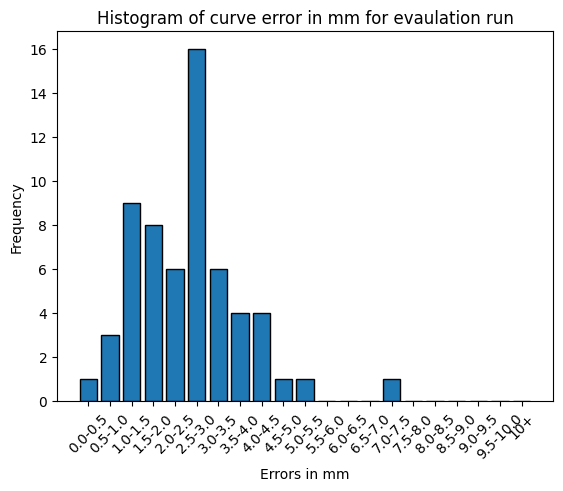

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 14.77
INFO:Logger:Average Furthest Distance Across Agents: 27.66
INFO:Logger:Episode 11: Total Reward = 29.58 | Final Avg Distance 1.34 | Distances in mm [0.4  0.   0.53 0.53 0.   0.27] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.56
INFO:Logger:Episode 12: Total Reward = 29.37 | Final Avg Distance 1.55 | Distances in mm [0.4  0.27 0.27 0.27 0.27 0.27] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.10
INFO:Logger:Episode 13: Total Reward = 24.80 | Final Avg Distance 1.52 | Distances in mm [0.12 0.25 0.25 0.25 0.24 0.5 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 27.16
INFO:Logger:Episode 14: Total Reward = 24.88 | Final Avg Distance 1.44 | Distances in mm [0.12 0.25 0.26 0.25 0.25 0.25] | Avg Closest Point = 0.00 | Avg Furthest Point = 27.64
INFO:Logger:Episode 15: Total Reward = 26.11 | Final Avg Distance 1.55 | Distances in mm [0.1  0.43 0.43 0.21 0.22 0.  ] | Avg Close

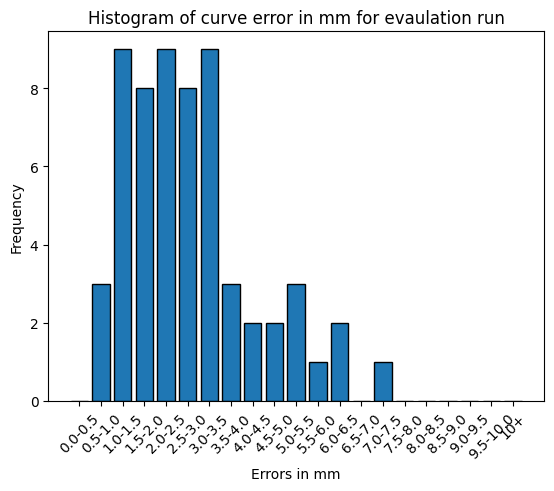

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 15.61
INFO:Logger:Average Furthest Distance Across Agents: 27.59
INFO:Logger:Episode 21: Total Reward = 26.32 | Final Avg Distance 1.35 | Distances in mm [0.1  0.21 0.   0.21 0.42 0.21] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.66
INFO:Logger:Episode 22: Total Reward = 26.26 | Final Avg Distance 1.40 | Distances in mm [0.11 0.   0.21 0.43 0.21 0.22] | Avg Closest Point = 0.00 | Avg Furthest Point = 29.25
INFO:Logger:Episode 23: Total Reward = 25.74 | Final Avg Distance 2.22 | Distances in mm [0.13 0.54 0.27 0.53 0.27 0.93] | Avg Closest Point = 0.17 | Avg Furthest Point = 30.52
INFO:Logger:Episode 24: Total Reward = 26.00 | Final Avg Distance 1.96 | Distances in mm [0.4  0.27 0.27 0.53 0.27 0.4 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 29.60
INFO:Logger:Episode 25: Total Reward = 22.02 | Final Avg Distance 1.79 | Distances in mm [0.24 0.35 0.37 0.35 0.35 0.22] | Avg Close

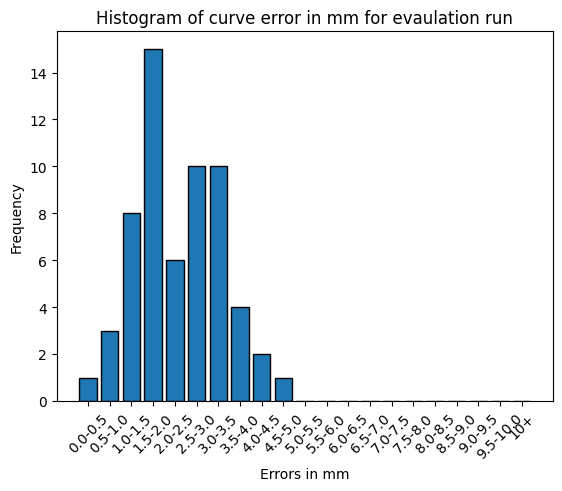

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 13.95
INFO:Logger:Average Furthest Distance Across Agents: 27.96
INFO:Logger:Episode 31: Total Reward = 20.37 | Final Avg Distance 9.50 | Distances in mm [0.83 3.91 3.02 1.31 1.78 2.2 ] | Avg Closest Point = 2.26 | Avg Furthest Point = 32.43
INFO:Logger:Episode 32: Total Reward = 27.93 | Final Avg Distance 1.94 | Distances in mm [0.3  0.46 0.53 0.15 0.28 0.15] | Avg Closest Point = 0.17 | Avg Furthest Point = 31.86
INFO:Logger:Episode 33: Total Reward = 24.83 | Final Avg Distance 1.49 | Distances in mm [0.36 0.   0.25 0.25 0.51 0.24] | Avg Closest Point = 0.17 | Avg Furthest Point = 29.61
INFO:Logger:Episode 34: Total Reward = 24.97 | Final Avg Distance 1.35 | Distances in mm [0.12 0.25 0.25 0.24 0.25 0.25] | Avg Closest Point = 0.00 | Avg Furthest Point = 28.95
INFO:Logger:Episode 35: Total Reward = 16.49 | Final Avg Distance 5.16 | Distances in mm [0.5  0.62 0.99 0.75 1.   2.15] | Avg Close

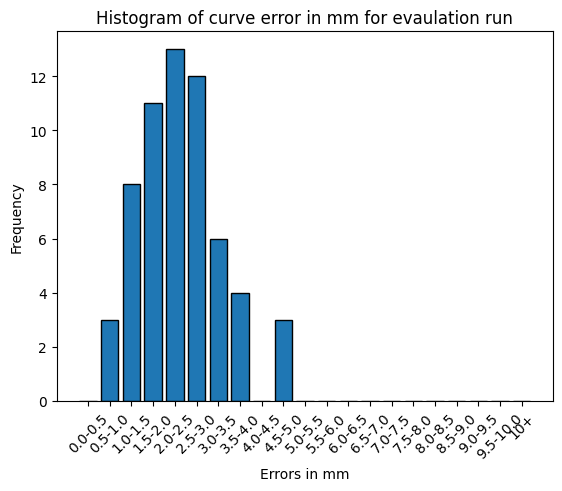

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.07
INFO:Logger:Average Furthest Distance Across Agents: 27.44
INFO:Logger:Episode 41: Total Reward = -1.29 | Final Avg Distance 29.31 | Distances in mm [3.69 4.97 2.76 4.97 7.76 4.41] | Avg Closest Point = 2.65 | Avg Furthest Point = 36.76
INFO:Logger:Episode 42: Total Reward = 25.94 | Final Avg Distance 2.08 | Distances in mm [0.86 0.23 0.23 0.1  0.33 0.3 ] | Avg Closest Point = 0.98 | Avg Furthest Point = 34.11
INFO:Logger:Episode 43: Total Reward = 4.37 | Final Avg Distance 25.05 | Distances in mm [2.68 2.95 9.27 2.82 0.8  8.99] | Avg Closest Point = 1.60 | Avg Furthest Point = 40.71
INFO:Logger:Episode 44: Total Reward = 28.15 | Final Avg Distance 1.28 | Distances in mm [0.27 0.27 0.27 0.13 0.27 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.64
INFO:Logger:Episode 45: Total Reward = 20.30 | Final Avg Distance 1.34 | Distances in mm [0.   0.37 0.26 0.26 0.26 0.12] | Avg Clos

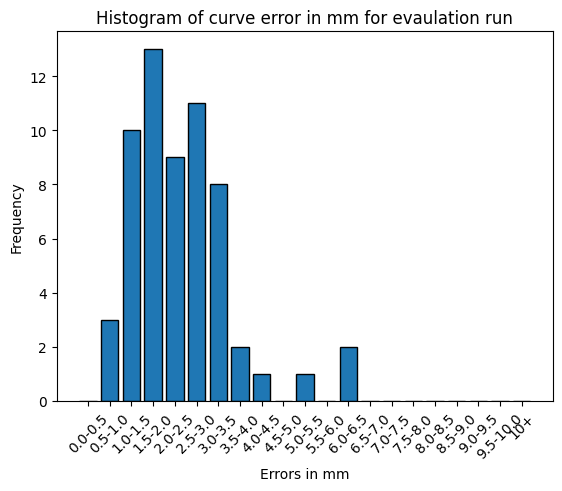

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.12
INFO:Logger:Average Furthest Distance Across Agents: 27.34


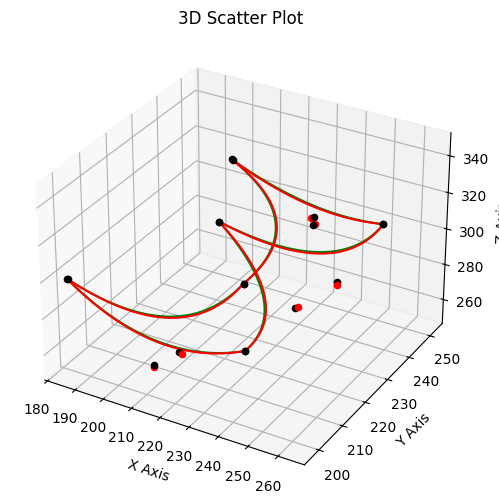

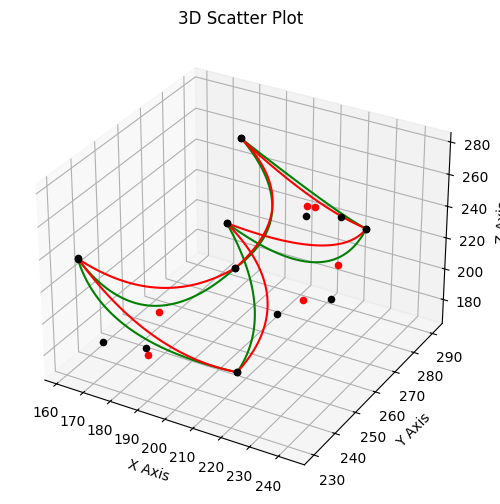

In [17]:
run_training(config)

In [ ]:
run_test(config)

Experiment 6: CommNet - share pairwise

In [18]:
config.experiment = Experiment.SHARE_PAIRWISE

INFO:Logger:Episode 1: Total Reward = 6.42 | Final Avg Distance 18.90 | Distances in mm [3.17 4.93 3.41 0.65 3.68 3.46] | Avg Closest Point = 8.30 | Avg Furthest Point = 36.34
INFO:Logger:Episode 2: Total Reward = 10.59 | Final Avg Distance 14.72 | Distances in mm [0.87 3.85 7.21 1.14 1.28 0.24] | Avg Closest Point = 7.07 | Avg Furthest Point = 35.42
INFO:Logger:Episode 3: Total Reward = 5.42 | Final Avg Distance 20.32 | Distances in mm [1.61 6.31 3.12 1.23 2.68 3.53] | Avg Closest Point = 3.91 | Avg Furthest Point = 30.64
INFO:Logger:Episode 4: Total Reward = 22.27 | Final Avg Distance 3.47 | Distances in mm [0.21 0.6  1.03 0.43 0.62 0.21] | Avg Closest Point = 1.97 | Avg Furthest Point = 27.69
INFO:Logger:Episode 5: Total Reward = 18.95 | Final Avg Distance 7.37 | Distances in mm [1.43 0.98 3.02 0.26 0.76 1.79] | Avg Closest Point = 1.98 | Avg Furthest Point = 29.77
INFO:Logger:Episode 6: Total Reward = 24.07 | Final Avg Distance 2.24 | Distances in mm [0.37 0.74 0.5  0.24 0.26 0.24]

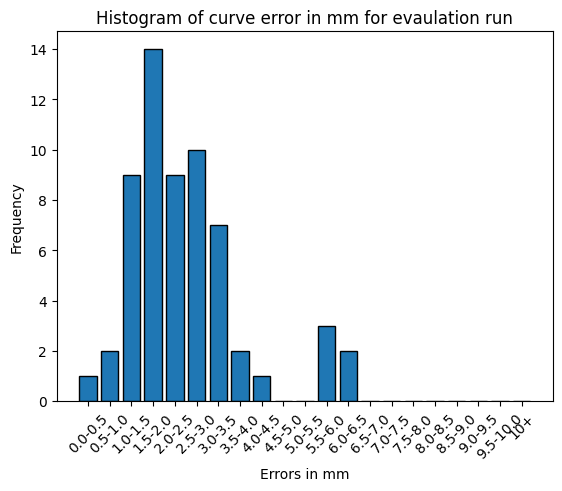

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 13.79
INFO:Logger:Average Furthest Distance Across Agents: 27.96
INFO:Logger:Episode 11: Total Reward = 30.65 | Final Avg Distance 3.02 | Distances in mm [0.14 0.37 0.91 0.33 1.04 0.33] | Avg Closest Point = 0.67 | Avg Furthest Point = 35.93
INFO:Logger:Episode 12: Total Reward = 32.23 | Final Avg Distance 1.45 | Distances in mm [0.37 0.14 0.37 0.14 0.33 0.14] | Avg Closest Point = 0.00 | Avg Furthest Point = 35.47
INFO:Logger:Episode 13: Total Reward = 31.98 | Final Avg Distance 1.69 | Distances in mm [0.37 0.37 0.37 0.41 0.37 0.1 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 36.71
INFO:Logger:Episode 14: Total Reward = 32.55 | Final Avg Distance 1.12 | Distances in mm [0.14 0.1  0.37 0.14 0.1  0.1 ] | Avg Closest Point = 0.33 | Avg Furthest Point = 35.68
INFO:Logger:Episode 15: Total Reward = 25.98 | Final Avg Distance 2.05 | Distances in mm [0.63 0.23 0.2  0.3  0.33 0.33] | Avg Close

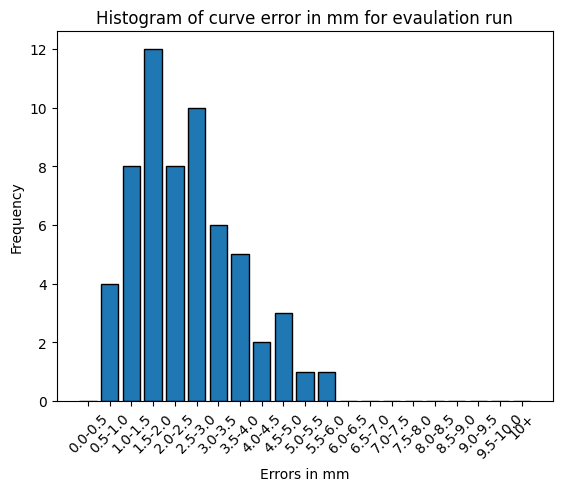

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.98
INFO:Logger:Average Furthest Distance Across Agents: 27.45
INFO:Logger:Episode 21: Total Reward = 28.37 | Final Avg Distance 1.51 | Distances in mm [0.26 0.42 0.28 0.13 0.28 0.15] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.35
INFO:Logger:Episode 22: Total Reward = 28.67 | Final Avg Distance 1.21 | Distances in mm [0.28 0.13 0.3  0.13 0.28 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.04
INFO:Logger:Episode 23: Total Reward = 28.32 | Final Avg Distance 2.60 | Distances in mm [0.66 0.27 0.53 0.8  0.53 0.27] | Avg Closest Point = 0.90 | Avg Furthest Point = 32.14
INFO:Logger:Episode 24: Total Reward = 29.63 | Final Avg Distance 1.28 | Distances in mm [0.13 0.53 0.27 0.   0.27 0.27] | Avg Closest Point = 0.00 | Avg Furthest Point = 33.04
INFO:Logger:Episode 25: Total Reward = 25.85 | Final Avg Distance 1.81 | Distances in mm [0.11 0.44 0.   0.22 0.43 0.44] | Avg Close

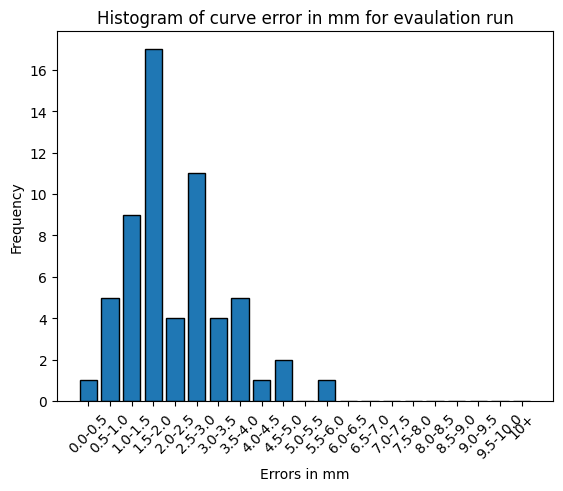

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 14.52
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 31: Total Reward = 29.24 | Final Avg Distance 1.68 | Distances in mm [0.13 0.53 0.27 0.27 0.27 0.27] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.38
INFO:Logger:Episode 32: Total Reward = 29.57 | Final Avg Distance 1.35 | Distances in mm [0.13 0.27 0.27 0.27 0.27 0.27] | Avg Closest Point = 0.00 | Avg Furthest Point = 32.71
INFO:Logger:Episode 33: Total Reward = 25.04 | Final Avg Distance 1.28 | Distances in mm [0.12 0.   0.25 0.25 0.25 0.51] | Avg Closest Point = 0.00 | Avg Furthest Point = 27.46
INFO:Logger:Episode 34: Total Reward = 24.68 | Final Avg Distance 1.64 | Distances in mm [0.37 0.25 0.25 0.25 0.25 0.5 ] | Avg Closest Point = 0.00 | Avg Furthest Point = 29.23
INFO:Logger:Episode 35: Total Reward = 18.60 | Final Avg Distance 3.05 | Distances in mm [0.26 0.38 0.49 0.53 1.   0.37] | Avg Close

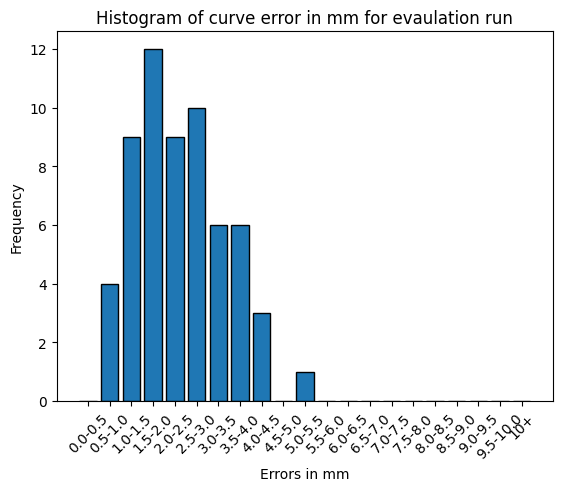

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.16
INFO:Logger:Average Furthest Distance Across Agents: 27.49
INFO:Logger:Episode 41: Total Reward = 24.15 | Final Avg Distance 3.80 | Distances in mm [0.67 1.34 0.27 0.8  0.54 0.66] | Avg Closest Point = 0.71 | Avg Furthest Point = 30.43
INFO:Logger:Episode 42: Total Reward = 26.68 | Final Avg Distance 1.28 | Distances in mm [0.13 0.27 0.27 0.27 0.27 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 29.34
INFO:Logger:Episode 43: Total Reward = 23.70 | Final Avg Distance 5.05 | Distances in mm [0.44 1.65 0.96 0.99 1.75 0.89] | Avg Closest Point = 1.88 | Avg Furthest Point = 32.69
INFO:Logger:Episode 44: Total Reward = 27.40 | Final Avg Distance 1.35 | Distances in mm [0.1  0.   0.27 0.17 0.37 0.62] | Avg Closest Point = 0.00 | Avg Furthest Point = 30.21
INFO:Logger:Episode 45: Total Reward = 24.62 | Final Avg Distance 5.25 | Distances in mm [0.3  0.7  1.5  1.02 2.13 0.74] | Avg Close

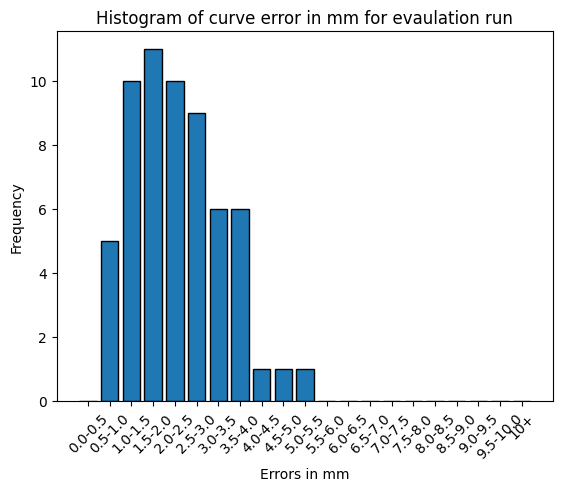

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.09
INFO:Logger:Average Furthest Distance Across Agents: 27.44


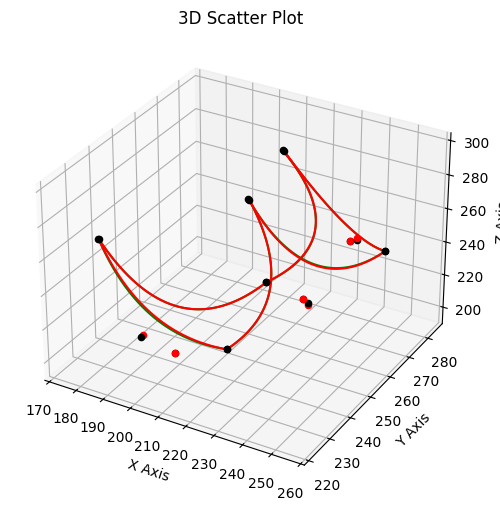

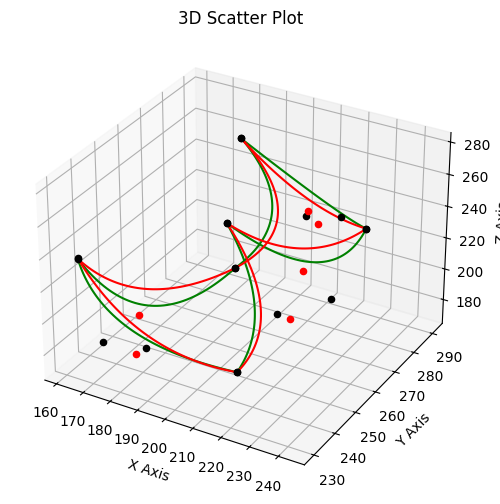

In [19]:
run_training(config)

In [ ]:
run_test(config)